In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read CSV file
df = pd.read_csv('NiftyReturnData.csv')
df.head()

,Date,Period,NiftyReturn
0,25-01-2001,1,-11%
1,24-02-2001,1,-23%
2,26-03-2001,1,-24%
3,25-04-2001,1,-18%
4,25-05-2001,1,-13%


In [5]:
# Convert NiftyReturn column to numeric after removing '%' sign
df['NiftyReturn'] = df['NiftyReturn'].str.replace('%', '').astype(float)

# Calculate average return and standard deviation for each period
summary_df = df.groupby('Period')['NiftyReturn'].agg(['mean', 'std']).reset_index()
summary_df.columns = ['Period', 'AvgReturn', 'Risk']
print(summary_df)

   Period  AvgReturn       Risk
0       1  15.347490  26.582381
1       2  13.870445  16.489940
2       3  13.855319  12.327975
3       4  14.026906   9.899003
4       5  13.957346   8.975261
5       6  13.693467   7.160604
6       7  13.278075   5.727476
7       8  12.937143   4.974827
8       9  12.650307   4.545427
9      10  12.589404   3.966983


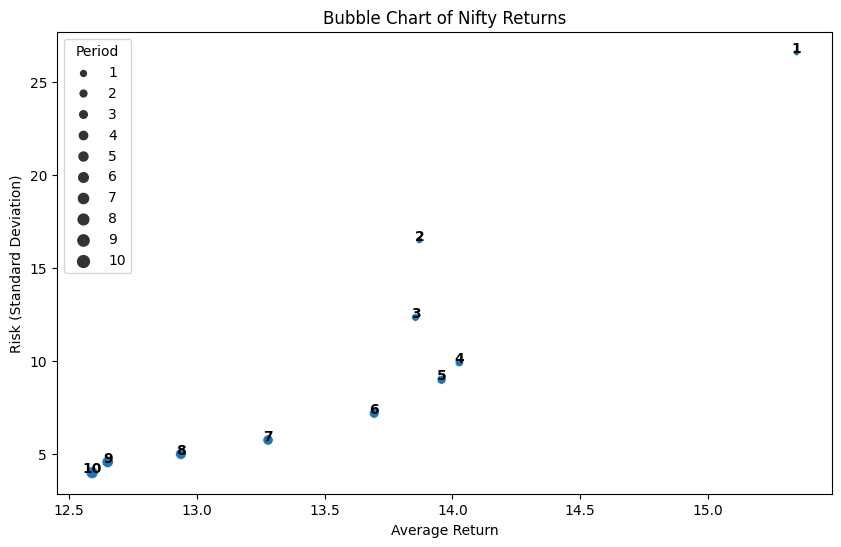

In [6]:
# Create bubble chart using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=summary_df, x='AvgReturn', y='Risk', size='Period', legend='full')

# Add title and labels
plt.title('Bubble Chart of Nifty Returns')
plt.xlabel('Average Return')
plt.ylabel('Risk (Standard Deviation)')

# Add data labels
for line in range(0, summary_df.shape[0]):
     plt.text(summary_df['AvgReturn'][line], summary_df['Risk'][line], 
              summary_df['Period'][line], horizontalalignment='center', 
              size='medium', color='black', weight='semibold')

# Save the chart as a PNG file
plt.savefig('bubble_chart2.png')
plt.show()

